In [38]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [39]:
from sklearn.datasets import load_wine
raw_wine = load_wine()

In [40]:
X = raw_wine.data
y = raw_wine.target

In [41]:
X.shape

(178, 13)

In [20]:
set(y)

{0, 1, 2}

## 타깃 데이터 원 핫 인코딩

In [21]:
from tensorflow.keras.utils import to_categorical
y_hot = to_categorical(y)

In [22]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y_hot, random_state=0)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation

n_feat = X_tn.shape[1]
n_class = len(set(y))
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_class))
model.add(Activation('softmax'))


In [26]:
# 신경망 모형 구조 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                280       
_________________________________________________________________
batch_normalization_2 (Batch (None, 20)                80        
_________________________________________________________________
activation_4 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 63        
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 423
Trainable params: 383
Non-trainable params: 40
_________________________________________________________________


In [28]:
# 모형 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [30]:
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Train on 133 samples
Epoch 1/30
133/133 [==============================] - 0s 324us/sample - loss: 0.4570 - accuracy: 0.8120
Epoch 2/30
133/133 [==============================] - 0s 257us/sample - loss: 0.3712 - accuracy: 0.8571
Epoch 3/30
133/133 [==============================] - 0s 279us/sample - loss: 0.4248 - accuracy: 0.8571
Epoch 4/30
133/133 [==============================] - 0s 309us/sample - loss: 0.4184 - accuracy: 0.8346
Epoch 5/30
133/133 [==============================] - 0s 270us/sample - loss: 0.3859 - accuracy: 0.8797
Epoch 6/30
133/133 [==============================] - 0s 301us/sample - loss: 0.3821 - accuracy: 0.9023
Epoch 7/30
133/133 [==============================] - 0s 293us/sample - loss: 0.4172 - accuracy: 0.8797
Epoch 8/30
133/133 [==============================] - 0s 263us/sample - loss: 0.3183 - accuracy: 0.8797
Epoch 9/30
133/133 [==============================] - 0s 241us/sample - loss: 0.3324 - accuracy: 0.8647
Epoch 10/30
133/133 [======================

In [31]:
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

133/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [32]:
import numpy as np
epoch = np.arange(1,epo+1)
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [33]:
accuracy = hist.history['accuracy']
print(accuracy)

[0.8120301, 0.85714287, 0.85714287, 0.83458644, 0.87969923, 0.90225565, 0.87969923, 0.87969923, 0.86466163, 0.84962404, 0.83458644, 0.87969923, 0.87218046, 0.85714287, 0.84210527, 0.8947368, 0.87969923, 0.87969923, 0.87969923, 0.8270677, 0.84962404, 0.87969923, 0.87969923, 0.84210527, 0.87969923, 0.8270677, 0.91729325, 0.84962404, 0.8947368, 0.90225565]


In [35]:
loss = hist.history['loss']
print(loss)

[0.45698476414707373, 0.3711805210861945, 0.4247902704584867, 0.41841212413588863, 0.38593225343559023, 0.3820974953416595, 0.4172213974976002, 0.31831573022711546, 0.332350909653911, 0.39324652846146346, 0.4887622427335359, 0.3467030454342975, 0.4424947115935777, 0.40718244525947067, 0.4768432863896951, 0.3584521709752262, 0.39263297404561726, 0.3457662169086306, 0.36940443095632064, 0.36687443780719786, 0.4100465475952715, 0.3827207221236444, 0.3950215321790455, 0.42237521915283416, 0.3017784261837938, 0.442486074297948, 0.2789015433561981, 0.4548566404141878, 0.3487536773869866, 0.33701861694567187]


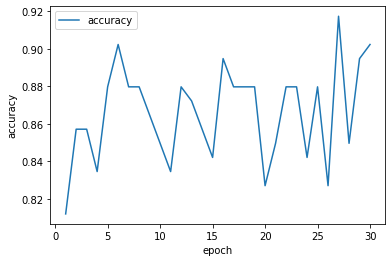

In [36]:
# 정확도 학습 그래프
import matplotlib.pyplot as plt
plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

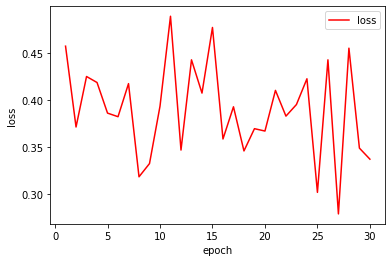

In [37]:
# 손실 그래프
import matplotlib.pyplot as plt
plt.plot(epoch, loss, 'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()